# Omsk, Omsk Oblast, Russia and its religion.

The data is downloaded from http://unro.minjust.ru/NKOs.aspx 

Minjust is the Ministry of Justice of Russian Federation, these particular reports are free to download. 

The questions I answer here:

* What is the religion distribution based on the registered religious organisations?
* What is the activity of the registered religious organisations (ceremonies, religious education, charity)?

The picture is not full as not all religions are registered as organisations. For example, pagans, atheists, satanists etc. are left out. Also, very few organisations provided activity reports.
Unfortunately, it is impossible to answer the question about the religion demographic data, as it is forbidden by law to publish suh information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# Read the data about the registered religious organisations, it is in Russian.
df = pd.read_excel('data/orgs.xlsx')
df.head()

,Учр номер,Наименование,ОГРН,Дата ОГРН,Адрес
0,5511010426,Местная религиозная организация мусульман цент...,1205500025675,12.11.2020,"644014, Омская обл, Омск г, Марьяновская 3-я у..."
1,5511010425,"Местная религиозная организация ""Приход храма ...",1205500017128,22.07.2020,"644077, Омская обл, Омск г, Народная ул, д. 17"
2,5511010424,Местная религиозная организация мусульман села...,1195543028933,06.11.2019,"646108, Омская обл, Называевский р-н, Старинка..."
3,5511010423,Местная религиозная организация мусульман села...,1195543024027,12.09.2019,"646580, Омская обл, Усть-Ишимский р-н, Большая..."
4,5511010422,Местная Исламская религиозная организация а. Д...,1195543024258,16.09.2019,"646048, Омская обл, Марьяновский р-н, Домбай а..."


In [3]:
len(df)
# There are 322 organisations in total

322

Add 2 columns to the dataframe, *"Religion"* (the religion name) and *"Religion Group"* it belongs two.
Defined the following large groups:
* Christianity
* Islam
* Other

Specified a lot of religions as "Other" because the amount of registered organisations is very small in Omsk, Russia.

In [4]:
df['Religion'] = ''
df['Religion Group'] = ''

df = df.rename(columns={'Наименование': 'Name'})
df['Name'] = df['Name'].str.upper() 

CHRISTIANITY = 'Christianity'
ISLAM = 'Islam'
OTHER = 'Other'

# Mark "Other" Religions (not Christianity or Islam)
df.loc[df['Name'].str.contains('БУДД'), ['Religion', 'Religion Group']] = (OTHER, 'Buddhism')
df.loc[df['Name'].str.contains('КРИШН') | df['Name'].str.contains('ШИВА'), 
       ['Religion', 'Religion Group']] = (OTHER, 'Induism')
df.loc[df['Name'].str.contains('ИУДЕ'),
       ['Religion', 'Religion Group']] = (OTHER, 'Judaism')
df.loc[df['Name'].str.contains('ШАМАН'),
       ['Religion', 'Religion Group']] = (OTHER, 'Shaman')

# Set "Religion" column for Islamic organisations
df.loc[df['Name'].str.contains('МУСУЛЬМ') |
df['Name'].str.contains('ИСЛАМ') | df['Name'].str.contains('ИМАН'), 'Religion'] = ISLAM

# Set "Religion", "Religion Group" columns for Christianity organisations
df.loc[df['Name'].str.contains('ПАТРИАРХАТ') | df['Name'].str.contains('ПРАВОСЛАВ'),
    ['Religion', 'Religion Group']]=(CHRISTIANITY, 'Orthodox')
df.loc[df['Name'].str.contains('БАПТИСТ'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Baptism')
df.loc[df['Name'].str.contains('КАТОЛИ'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Catolicism')
df.loc[df['Name'].str.contains('МЕННОНИТ'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Mennonite')
df.loc[df['Name'].str.contains('МОЛОКАН'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Molokan')
df.loc[df['Name'].str.contains('АРМЯН'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Armenian Apostolic Ch.')
df.loc[df['Name'].str.contains('АДВЕНТИСТ'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Adventism')   
df.loc[df['Name'].str.contains('НОВОАПОСТОЛ'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'New Apostolic Ch.')
df.loc[df['Name'].str.contains('ПОСЛЕДНИХ ДНЕЙ'),
    ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Mormon')   
df.loc[(df['Name'].str.contains('ЕВАНГЕЛ')) &
(~df['Name'].str.contains('БАПТИСТ')) &
(~df['Name'].str.contains('ПРАВОС')), ['Religion', 'Religion Group']] = (CHRISTIANITY, 'Baptism')

Aggregate dataframe by religion name and religion groups for pie charts

In [5]:
df_all_religions = df.groupby('Religion').agg({'Name': len})
df_other = df[df['Religion'] == 'Other'].groupby('Religion Group').agg({'Name': len})
df_christ = df[df['Religion'] == 'Christianity'].groupby('Religion Group').agg({'Name': len})

Plot pie charts for all registered religions and details for "Others"

<IPython.core.display.Javascript object>


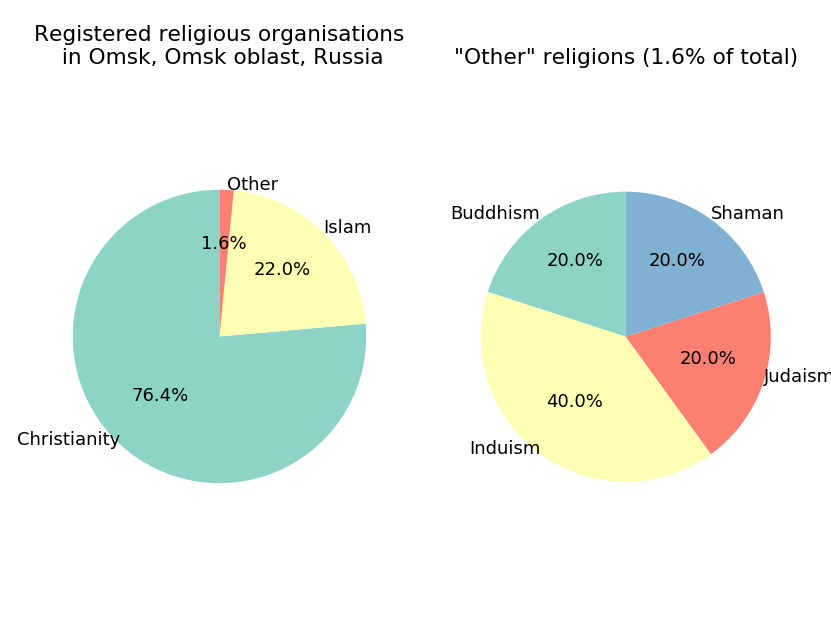

In [6]:
%matplotlib notebook

labels = df_all_religions.index
sizes = df_all_religions['Name']

def get_color_for_sector(sector_number):
    return plt.cm.Set3((sector_number)/8.)

fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, labeldistance=1, rotatelabels=False,
        colors=[get_color_for_sector(i) for i, l in enumerate(labels)],
        textprops = dict(va='baseline'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Registered religious organisations\n in Omsk, Omsk oblast, Russia')

labels = df_other.index
sizes = df_other['Name']

ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, labeldistance=1, rotatelabels=False,
        colors=[get_color_for_sector(i) for i, l in enumerate(labels)],
        textprops = dict(va='baseline'))
ax2.set_title('"Other" religions (1.6% of total)')
ax2.axis('equal')

fig1.tight_layout() # adjust subplots padding

plt.show()


Plot Christianity religions breakdown

<IPython.core.display.Javascript object>


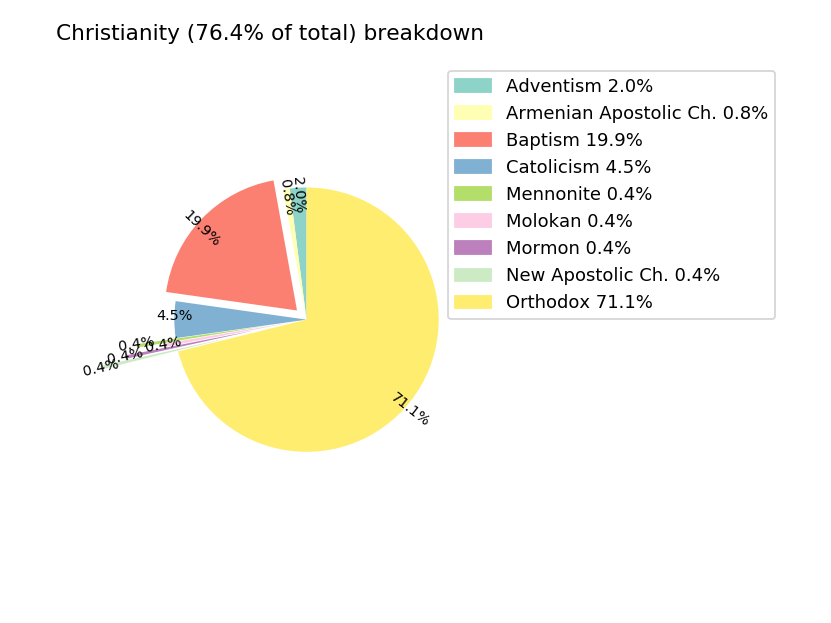

In [7]:
fig2, ax3 = plt.subplots()

labels = df_christ.index
sizes = df_christ['Name']
total_christ = sum(sizes)

# the fraction of the radius with which to offset each wedge
# to make labels non-overlapped
explode = (0, 0, 0.1, 0, 0.3, 0.1, 0.4, 0.6, 0)

labels_ = ['{:.1f}%'.format( sizes.iloc[i] * 100 / total_christ) for i, l in enumerate(labels)]

ax3.pie(sizes, 
        labels=labels_, autopct='',
        explode=explode,
        # radius=5,        
        startangle=90, labeldistance=1, rotatelabels=True,
        colors=[get_color_for_sector(i) for i, l in enumerate(labels)],
        textprops = dict(ha='center', va='baseline', fontsize=8))
ax3.set_title('Christianity (76.4% of total) breakdown\n')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Customize legend
handles = []
total_christ = sum(sizes)
labels_ = ['{} {:.1f}%'.format(l, sizes.iloc[i] * 100 / total_christ) for i, l in enumerate(labels)]
for i, l in enumerate(labels_):
    handles.append(Patch(color=get_color_for_sector(i), label=l))
plt.legend(handles,labels_, bbox_to_anchor=(0.95,1.025), loc="upper left")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.55)

plt.show()

## Religious organisations activity

In [8]:
# Read data about the organisations activity
df = pd.read_excel('data/church_reports.xlsx', skiprows=1)
df.head()

,ОГРН,Наименование,Адрес,"Совершение религиозных обрядов, таинств, церемоний",Религиозное образование,Распространение вероучения непосредственно или через СМИ,Культурно-просветительская деятельность,Распространение предметов религиозного назначения и религиозной литературы,Благотворительная деятельность и иная деятельность в сфере социального обслуживания,Отчетный период,Поступления от российских юридических лиц,Поступления от иностранных юридических лиц,"Гранты, техническая или гуманитарная помощь от иностранных государств",Доходы от предпринимательской деятельности,Поступления от граждан Российской Федерации,"Расходы за период, тыс. Руб."
0,1085500001707,"Местная Религиозная Организация ""Церковь Божия...","644903Омская обл, Омский р-н, деревня Приветна...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,NaN,NaN
1,1 0 2 5 5 0 0 0 0 2 8 3 5,Религиозное учреждение - Омское отделение Благ...,"644070, г.Омск, ул.Звездова, д.62 / 1",1.0,NaN,NaN,1.0,NaN,1.0,2013,1.0,1.0,1.0,1.0,1.0,15043.0
2,1 0 2 5 5 0 0 0 0 6 5 7 5,"Омская областная Христианская Церковь ""Часовня...","644076 г.Омск, пр. Космический, д.28, к.19",1.0,NaN,NaN,1.0,1.0,1.0,2013,NaN,NaN,NaN,NaN,1.0,173.0
3,1 0 2 5 5 0 0 0 0 6 8 2 8,"Местная религиозная организация ""Церковь Свято...","Омская обл.,Москаленский р-н, р.п.Москаленки, ...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,99876.0
4,1 0 3 5 5 0 0 0 0 1 8 7 7,"Местная религиозная организация ""Церковь Свято...","644033, г.Омск, ул. 8-я Северная, д.113",1.0,NaN,1.0,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,2473.0


The reportted activities are the following:
* Ceremonies
* Spreading Doctrine via Media
* Religious Education
* Cultural Activities
* Literature Distribution
* Charity

In [9]:
# "Performing religious rites, sacraments, ceremonies" - "Ceremony" boolean column
# "Spread doctrine in media" - "Media Spread" boolean colums

df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns={'Наименование': 'Name',
                        'Отчетный период': 'Year',
                        'Совершение религиозных обрядов, таинств, церемоний': 'Ceremonies',
                        'Распространение вероучения непосредственно или через СМИ':
                            'Spreading Doctrine via Media',
                        'Религиозное образование': 'Religious Education',
                        'Культурно-просветительская деятельность': 'Cultural Activities',
                        'Распространение предметов религиозного назначения и религиозной литературы':
                            'Literature Distribution',
                        'Благотворительная деятельность и иная деятельность в сфере социального обслуживания':
                            'Charity',
                        'Расходы за период, тыс. Руб.': 'Expenditures'})

df.head()

,ОГРН,Name,Адрес,Ceremonies,Religious Education,Spreading Doctrine via Media,Cultural Activities,Literature Distribution,Charity,Year,Поступления от российских юридических лиц,Поступления от иностранных юридических лиц,"Гранты, техническая или гуманитарная помощь от иностранных государств",Доходы от предпринимательской деятельности,Поступления от граждан Российской Федерации,Expenditures
0,1085500001707,"Местная Религиозная Организация ""Церковь Божия...","644903Омская обл, Омский р-н, деревня Приветна...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,NaN,NaN
1,1 0 2 5 5 0 0 0 0 2 8 3 5,Религиозное учреждение - Омское отделение Благ...,"644070, г.Омск, ул.Звездова, д.62 / 1",1.0,NaN,NaN,1.0,NaN,1.0,2013,1.0,1.0,1.0,1.0,1.0,15043.0
2,1 0 2 5 5 0 0 0 0 6 5 7 5,"Омская областная Христианская Церковь ""Часовня...","644076 г.Омск, пр. Космический, д.28, к.19",1.0,NaN,NaN,1.0,1.0,1.0,2013,NaN,NaN,NaN,NaN,1.0,173.0
3,1 0 2 5 5 0 0 0 0 6 8 2 8,"Местная религиозная организация ""Церковь Свято...","Омская обл.,Москаленский р-н, р.п.Москаленки, ...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,99876.0
4,1 0 3 5 5 0 0 0 0 1 8 7 7,"Местная религиозная организация ""Церковь Свято...","644033, г.Омск, ул. 8-я Северная, д.113",1.0,NaN,1.0,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,2473.0


In [11]:
labels = ['Ceremonies',
          'Spreading Doctrine via Media',
          'Religious Education',
          'Cultural Activities',
          'Literature Distribution',
          'Charity']
df_activity = df.groupby(['Year', 'Name']).agg({label: sum for label in labels})

Plot Religion Organisations Activities bar chart

<IPython.core.display.Javascript object>


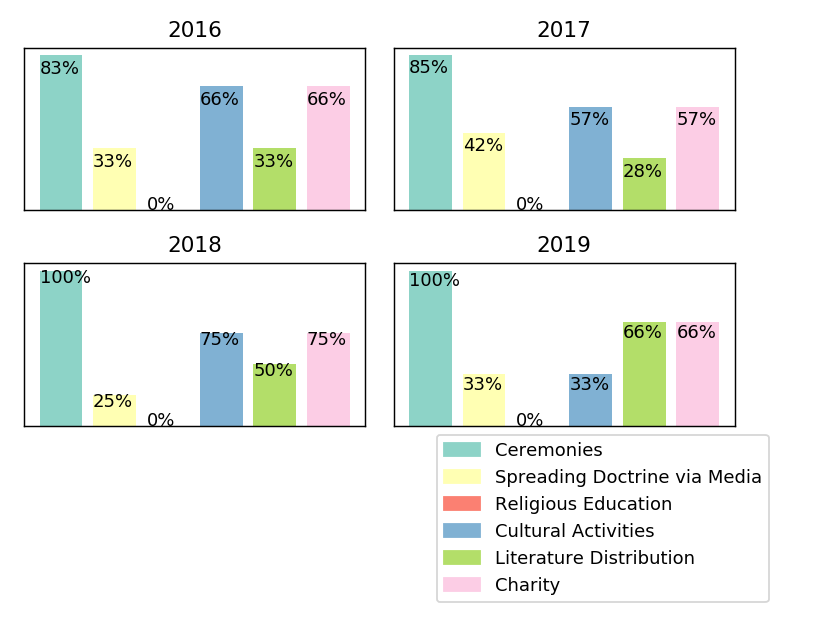

In [12]:
fig3, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

pos = labels#  np.arange(6)
axes = {
    2016: ax1,
    2017: ax2,
    2018: ax3,
    2019: ax4,
}

for year, axis in axes.items():
    axis.set_title(year)
    activity = df_activity.loc[year].mean()
    bars = axis.bar(pos, activity, align='center', linewidth=0, 
                    color=[get_color_for_sector(i) for i, l in enumerate(labels)],)
    axis.tick_params(top=False, bottom=False, left=False, right=False,
                     labelleft=False, labelbottom=False)
    for bar in bars:
        height = bar.get_height()
        value = int(height*100)
        if value > 100:
            value = 100
        
        if height > 0:
            height -= 0.1
        axis.text(bar.get_x(),
                  height,
                  str(value) + '%')

# Customize legend
handles = []
for i, l in enumerate(labels):
    handles.append(Patch(color=get_color_for_sector(i), label=l))
plt.legend(handles,labels, bbox_to_anchor=(0.1, 0), loc="upper left")

fig3.tight_layout() # adjust subplots padding